In [1]:
import agentpy as ap 
import numpy as np #for scientific computing 
import scipy as sp #for scientific computing
import matplotlib.pyplot as plt #for graphs and visualisation
import pandas as pd #for data manipulation
import networkx as nx #for networks and graphs
!pip install ipywidgets

In [2]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import agentpy as ap
import numpy as np

Completed: 31 steps
Run time: 0:00:00.007000
Simulation finished


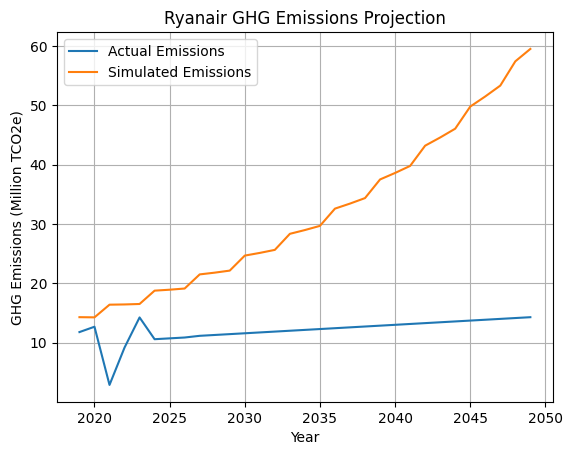

interactive(children=(FloatSlider(value=9.0, description='Average Fleet Age', max=15.0, step=1.0), FloatSlider…

<function __main__.run_simulation(initial_age, initial_passengers)>

In [3]:
# Define the AirlineAgent class
class AirlineAgent(ap.Agent):
    def setup(self):
        self.age = self.model.p['initial_age']
        self.passengers = self.model.p['initial_passengers']
        self.ghg_emissions = []

    def calculate_emissions(self):
        emissions = self.age * (-0.71) + self.passengers * 0.08 + 7.1
        self.ghg_emissions.append(emissions)

    def update(self):
        if self.age == 10:
            self.age -= 2
        else:    
            self.age += 1
            
        self.passengers *= 1.05

# Define the AirlineModel class
class AirlineModel(ap.Model):
    def setup(self):
        self.airline = AirlineAgent(self)

    def step(self):
        self.airline.calculate_emissions()
        self.airline.update()

    def end(self):
        self.ghg_emissions = self.airline.ghg_emissions

# Emissions data from 2019 to 2050 (divided by 1 million for scaling)
emissions_data = np.array([
    11.8, 12.7, 2.9, 9.193324, 14.266186, 10.599611, 10.74218, 10.88475,
    11.169889, 11.312459, 11.455028, 11.597598, 11.740168, 11.882737, 
    12.025307, 12.167876, 12.310446, 12.453016, 12.595585, 12.738155, 
    12.880724, 13.023294, 13.165864, 13.308433, 13.451003, 13.593572, 
    13.736142, 13.878712, 14.021281, 14.163851, 14.30642
]) 

# Set initial parameters
parameters = {
    'initial_age': 9,            # Initial average age of the fleet
    'initial_passengers': 170,   # Initial number of passengers
    'steps': len(emissions_data) # Number of years to simulate
}

# Create the model instance
model = AirlineModel(parameters)
results = model.run()

# Extract results
simulated_emissions = model.ghg_emissions

# Plot the results
years = list(range(2019, 2019 + len(emissions_data)))
plt.plot(years, emissions_data, label='Actual Emissions')
plt.plot(years, simulated_emissions, label='Simulated Emissions')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (Million TCO2e)')
plt.title('Ryanair GHG Emissions Projection')
plt.legend()
plt.grid(True)
plt.show()

# Create interactive sliders
age_slider = widgets.FloatSlider(
    description='Average Fleet Age', min=0, max=15, step=1, value=9)
passengers_slider = widgets.FloatSlider(
    description='Number of Passengers', min=0, max=300, step=10, value=170)

# Define the function to run the simulation with the interactive sliders
def run_simulation(initial_age, initial_passengers):
    parameters['initial_age'] = initial_age
    parameters['initial_passengers'] = initial_passengers

    # Create the model instance
    model = AirlineModel(parameters)
    results = model.run()

    # Extract results
    simulated_emissions = model.ghg_emissions

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(years, emissions_data, label='Actual Emissions')
    plt.plot(years, simulated_emissions, label='Simulated Emissions')
    plt.xlabel('Year')
    plt.ylabel('GHG Emissions (Million TCO2e)')
    plt.title('Ryanair GHG Emissions Projection')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
widgets.interact(
    run_simulation,
    initial_age=age_slider,
    initial_passengers=passengers_slider
)